# Excavator use-case 3: task constraints

In [9]:
import processscheduler as ps

problem = ps.SchedulingProblem('Excavator3:TaskPrecedenceConstraint')

# three tasks
dig_small_hole = ps.FixedDurationTask('DigSmallHole', duration=3)
dig_medium_hole = ps.FixedDurationTask('DigMediumHole', duration=7)
dig_huge_hole = ps.FixedDurationTask('DigHugeHole', duration=15)

# two workers
small_exc = ps.Worker('SmallExcavator')
medium_ex = ps.Worker('MediumExcavator')

dig_small_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))
dig_medium_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))
dig_huge_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))

# adds a precedence constraint: task_2 must be scheduled after task_3

ps.TaskPrecedence(task_before=dig_medium_hole, task_after=dig_huge_hole)

solver = ps.SchedulingSolver(problem)
solution = solver.solve()

Solver type:
	-> Standard SAT/SMT solver
Total computation time:
	Excavator3:TaskPrecedenceConstraint satisfiability checked in 0.01s


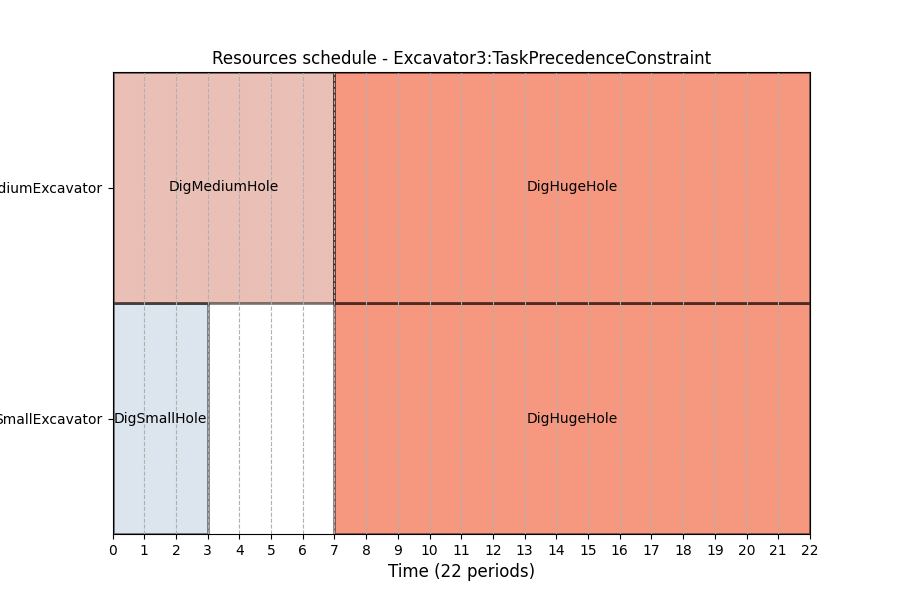

In [10]:
solution.render_gantt_matplotlib()

Solver type:
	-> Standard SAT/SMT solver
Total computation time:
	Excavator3:TaskPrecedenceConstraint satisfiability checked in 0.01s


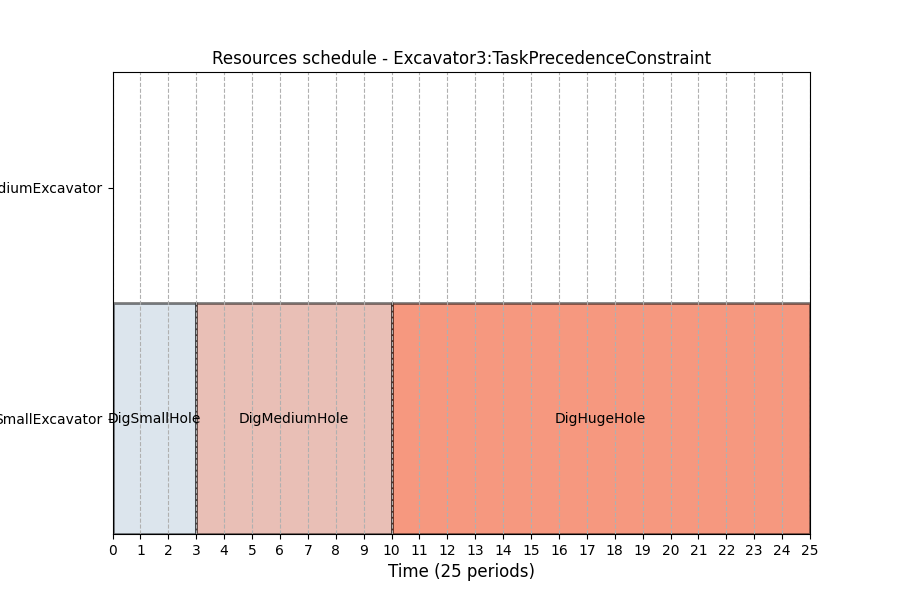

In [12]:
ps.TaskPrecedence(task_before=dig_small_hole, task_after=dig_medium_hole)
solver = ps.SchedulingSolver(problem)
solution2 = solver.solve()
solution2.render_gantt_matplotlib()